In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Add src to path for imports
sys.path.append(os.path.join('..', 'src'))
from simulation import Simulation


In [2]:
# Run a basic asexual simulation
sim = Simulation(
    population_size=50,
    genome_length=20,
    mutation_rate=0.01,
    mode='asexual',
    generations=50,
    random_seed=42
)

print("Running simulation...")
sim.run()
results = sim.get_results()
print(f"Simulation complete. Generated {len(results)} data points.")
print("\nFirst few rows:")
results.head()


Running simulation...
Simulation complete. Generated 51 data points.

First few rows:


,generation,mean_fitness,mean_heterozygosity
0,0,10.44,0.49232
1,1,10.98,0.48588
2,2,11.46,0.47868
3,3,12.34,0.45092
4,4,12.78,0.42580


In [3]:
# Basic statistics
print("Dataset shape:", results.shape)
print("\nColumn names:", list(results.columns))
print("\nSummary statistics:")
results.describe()


Dataset shape: (51, 3)

Column names: ['generation', 'mean_fitness', 'mean_heterozygosity']

Summary statistics:


,generation,mean_fitness,mean_heterozygosity
count,51.000000,51.000000,51.000000
mean,25.000000,15.423137,0.258920
std,14.866069,1.612384,0.096422
min,0.000000,10.440000,0.140400
25%,12.500000,15.220000,0.205000
50%,25.000000,16.000000,0.228960
75%,37.500000,16.440000,0.283800
max,50.000000,17.220000,0.492320


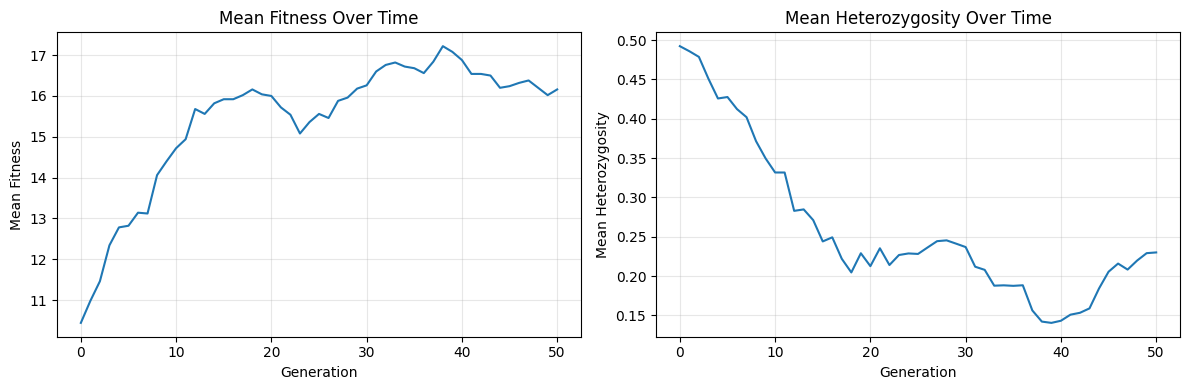

In [4]:
# Simple line plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot mean fitness over time
ax1.plot(results['generation'], results['mean_fitness'])
ax1.set_xlabel('Generation')
ax1.set_ylabel('Mean Fitness')
ax1.set_title('Mean Fitness Over Time')
ax1.grid(True, alpha=0.3)

# Plot heterozygosity over time
ax2.plot(results['generation'], results['mean_heterozygosity'])
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean Heterozygosity')
ax2.set_title('Mean Heterozygosity Over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
